# Topic 17 - Classification Demonstration

In this demonstration we will train some classifier algorithms on the MNIST data set.

We will start by loading the dataset from the Scikit-learn library.

**Note: This may take a long time to execute - there are 70000 images.**


In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()
#dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details','categories', 'url'])

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

Next we will preview one of the images and its corresponding label.

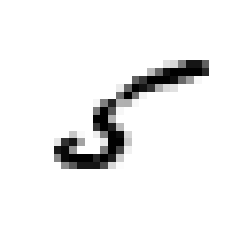

In [32]:
import matplotlib as mpl
import matplotlib.pyplot as plt

#Assign the data and the targets
X, y = mnist["data"], mnist["target"]

#Display the first image
some_digit = X[11]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [33]:
#The corresponding class label
y[11]

'5'

Next we will partition the data into a training and testing sets. We are going to train a binary classifier that detects the number "5", so we need to find all of the 5s and mark them as "true" in the train and test sets.

In [28]:
import numpy as np
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)


Now its time to train the classifier. We will train a stochastic gradient descent classifier.

We will set the random state for reproducability.


In [18]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Now we can do a simple test to see if our classifier can classify a an image from the training set. We will look at a full test later.

The letter in `X[0]` represents a "5", hence a result of "true" is expected.

In [34]:
sgd_clf.predict([X[11]])

array([ True])